# Comparing Haar Cascade Classifier and ImageAI technologies for recognizing human bodies on images

On image nr 1, total number of people detected: 9
On image nr 2, total number of people detected: 10
On image nr 3, total number of people detected: 9
On image nr 4, total number of people detected: 9
On image nr 5, total number of people detected: 9
On image nr 6, total number of people detected: 7
On image nr 7, total number of people detected: 6
On image nr 8, total number of people detected: 5
On image nr 9, total number of people detected: 7
On image nr 10, total number of people detected: 11
On image nr 11, total number of people detected: 2
On image nr 12, total number of people detected: 10
On image nr 13, total number of people detected: 10
On image nr 14, total number of people detected: 7
On image nr 15, total number of people detected: 9
On image nr 16, total number of people detected: 6
On image nr 17, total number of people detected: 5
On image nr 18, total number of people detected: 9
On image nr 19, total number of people detected: 4
On image nr 20, total number of peop

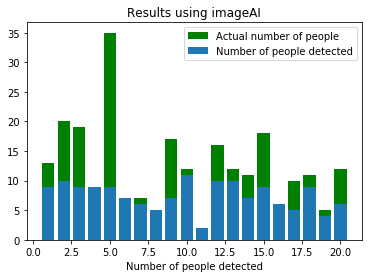

In [14]:
"""
Kamil Morawiecki
'sdmms'
Pedagogical University of Cracov - student project

Recognizing human body from image using ImageAI:
https://github.com/OlafenwaMoses/ImageAI
"""

import matplotlib.pyplot as plt
from imageai.Detection import ObjectDetection
import os



execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath("resnet50_coco_best_v2.0.1.h5")
detector.loadModel()
custom_objects = detector.CustomObjects(person=True, car=False)


nrOfPeopleDetected = []
nOfPeople = [ 13, 20, 19, 9, 35, 6, 7, 5, 17, 12, 2, 16, 12, 11, 18, 6, 10, 11, 5, 12 ]


def detect(img_src):

    detections = detector.detectCustomObjectsFromImage(input_image=str(img_src), custom_objects=custom_objects, minimum_percentage_probability=65)


    cnt = 0


    for eachObject in detections:
       cnt = cnt + 1
        
    return cnt


 
for i in range(1,21):
    total = detect("C:/Users/Kamil/Desktop/BodyDetection-Python/test_images/image" + str(i) + ".jpg")
    nrOfPeopleDetected.append(total)
    print("On image nr " + str(i) + ", total number of people detected: " + str(total))
    
    

plt.bar(range(1,21), nOfPeople, label = "Actual number of people", color = 'g')
plt.bar(range(1,21), nrOfPeopleDetected, label = "Number of people detected")
plt.legend()
plt.xlabel('Image nr')
plt.xlabel('Number of people detected')

plt.title("Results using imageAI")
plt.show()



Image nr 1, nr of people detected: 1
Image nr 2, nr of people detected: 1
Image nr 3, nr of people detected: 8
Image nr 4, nr of people detected: 1
Image nr 5, nr of people detected: 5
Image nr 6, nr of people detected: 8
Image nr 7, nr of people detected: 9
Image nr 8, nr of people detected: 5
Image nr 9, nr of people detected: 5
Image nr 10, nr of people detected: 1
Image nr 11, nr of people detected: 8
Image nr 12, nr of people detected: 4
Image nr 13, nr of people detected: 3
Image nr 14, nr of people detected: 7
Image nr 15, nr of people detected: 7
Image nr 16, nr of people detected: 0
Image nr 17, nr of people detected: 2
Image nr 18, nr of people detected: 6
Image nr 19, nr of people detected: 2
Image nr 20, nr of people detected: 0


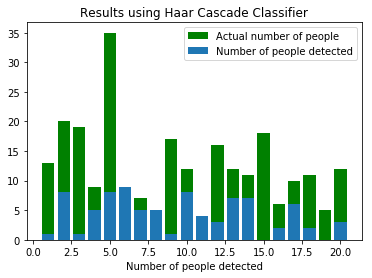

In [20]:
# -*- coding: utf-8 -*-
"""
Kamil Morawiecki
'sdmms'
Pedagogical University of Cracov - student project

Recognizing human body from image using Haar Cascade Classifier
"""

import cv2
import matplotlib.pyplot as plt



#import cascade classifier of human body
body_csc = cv2.CascadeClassifier('C:/Users/Kamil/Desktop/BodyDetection-Python/haarcascade_fullbody.xml')

#table with actual number of people on each test image detected and counted by human
nOfPeople = [ 13, 20, 19, 9, 35, 6, 7, 5, 17, 12, 2, 16, 12, 11, 18, 6, 10, 11, 5, 12 ]

#table for saving numbers of people detected by computer
nOfPeopleDetected = []

#table for saving best stetting
bestSettings = []


for i in range(1, 21):
    
    #import image and save as value returned by 'imread' function of OpenCV
    img = cv2.imread('C:/Users/Kamil/Desktop/BodyDetection-Python/test_images/image'+str(i)+'.jpg')
    
    #converting image to monochromatic color and saving as 'gray' variable
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    
    peopleDetected = 0
    

    #detecting human bodies on image
    bodies = body_csc.detectMultiScale(gray, 1.1, 2)
    #drawing rectangles on elements of image recognized as human body
        
    cnt = 0
        
    for (x,y,w,h) in bodies:
        cv2.rectangle(img, (x,y), (x+w,y+h), (64,255,64), 2)
        cnt = cnt + 1
            
        
        
    nOfPeopleDetected.append(cnt)    
       
        
        
        
    print("Image nr " + str(i) + ", nr of people detected: " + str(nOfPeopleDetected[i-2]))
       
        
        
        
plt.bar(range(1,21), nOfPeople, label = "Actual number of people", color = 'g')
plt.bar(range(1,21), nOfPeopleDetected, label = "Number of people detected")
plt.legend()
plt.xlabel('Image nr')
plt.xlabel('Number of people detected')

plt.title("Results using Haar Cascade Classifier")
plt.show()

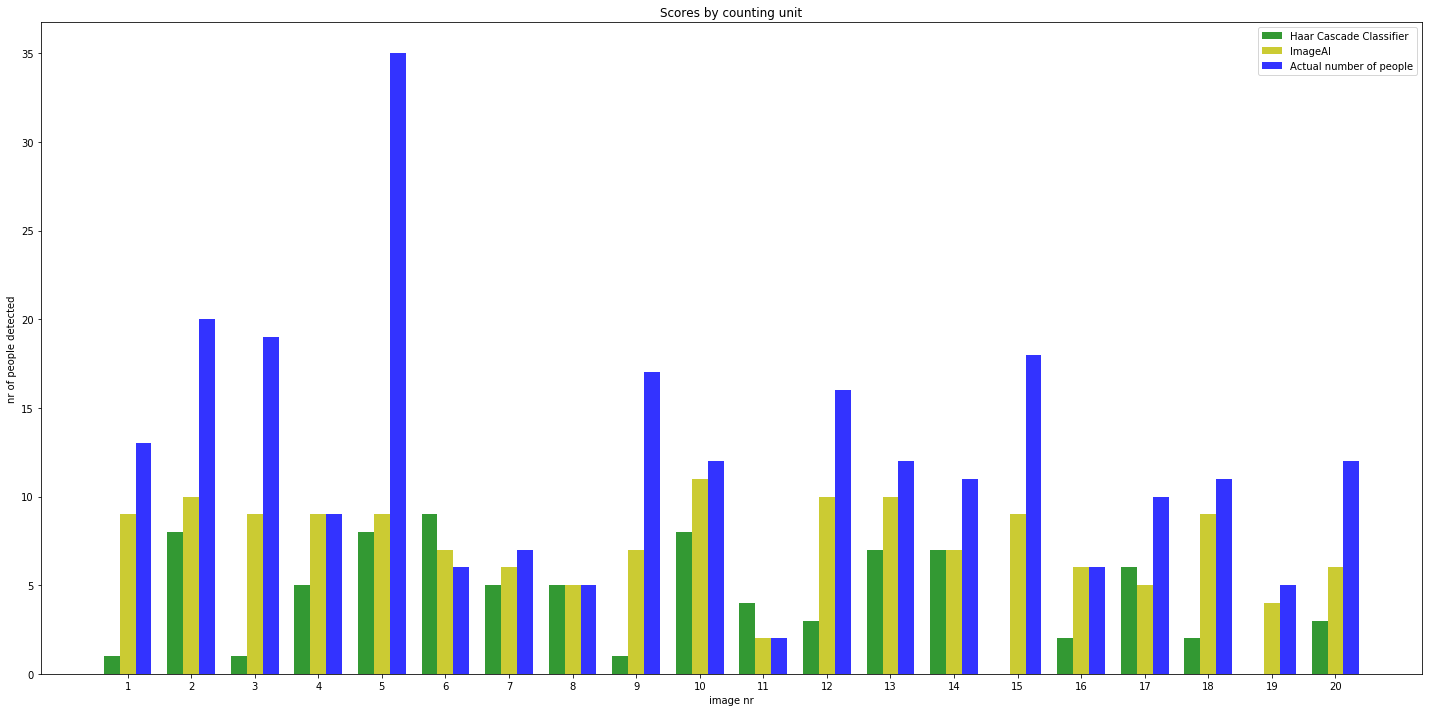

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


plt.rcParams['figure.figsize'] = (20, 10)


fig, ax = plt.subplots()
index = np.arange(20)
bar_width = 0.25
opacity = 0.8
 
rects1 = plt.bar(index, nOfPeopleDetected, bar_width,
alpha=opacity,
color='g',
label='Haar Cascade Classifier')
 
rects2 = plt.bar(index + bar_width, nrOfPeopleDetected, bar_width,
alpha=opacity,
color='y',
label='ImageAI')

rects3 = plt.bar(index + 2*bar_width, nOfPeople, bar_width,
alpha=opacity,
color='b',
label='Actual number of people')
 
plt.xlabel('image nr')
plt.ylabel('nr of people detected')
plt.title('Scores by counting unit')
plt.xticks(index + bar_width, range(1,21))
plt.legend()
 
plt.tight_layout()
plt.show()